### 참고 사이트

- 웹캠 영상에서 검출된 얼굴에 모자이크
    * https://bskyvision.com/934
- 얼굴 검출
    * https://bskyvision.com/675
- 얼굴 검출 후 성별 인식
    * https://bskyvision.com/entry/%EC%96%BC%EA%B5%B4-%EA%B2%80%EC%B6%9C-%ED%9B%84-%EC%84%B1%EB%B3%84-%EC%98%88%EC%B8%A1-%EC%9A%B0%EB%B6%84%ED%88%AC-%ED%8C%8C%EC%9D%B4%EC%8D%AC?category=835013

### 웹캠으로 실시간 얼굴 모자이크

In [9]:
# # import necessary packages
# import cvlib as cv
# import cv2
 
# # open webcam
# webcam = cv2.VideoCapture(0)
 
# if not webcam.isOpened():
#     print("Could not open webcam")
#     exit()
    
 
# # loop through frames
# while webcam.isOpened():
 
#     # read frame from webcam 
#     status, frame = webcam.read()
 
#     if not status:
#         print("Could not read frame")
#         exit()
 
#     # apply face detection
#     face, confidence = cv.detect_face(frame)
 
#     print(face)
#     print(confidence)
 
#     # loop through detected faces
#     for idx, f in enumerate(face):
        
#         (startX, startY) = f[0], f[1]
#         (endX, endY) = f[2], f[3]
 
#         '모자이크 효과 주기: 얼굴 부분을 줄였다가 다시 원크기로 복구시키면 모자이크처럼 됨.'
#         face_region = frame[startY:endY, startX:endX]
        
#         M = face_region.shape[0]
#         N = face_region.shape[1]
 
#         face_region = cv2.resize(face_region, None, fx=0.05, fy=0.05, interpolation=cv2.INTER_AREA)
#         face_region = cv2.resize(face_region, (N, M), interpolation=cv2.INTER_AREA)
#         frame[startY:endY, startX:endX] = face_region
 
#     # display output
#     cv2.imshow("Real-time face detection", frame)
 
#     # press "Q" to stop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
    
# # release resources
# webcam.release()
# cv2.destroyAllWindows() 


---
### 파이썬 이용 얼굴 검출

In [17]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import os

./face\hyesoo.jpg


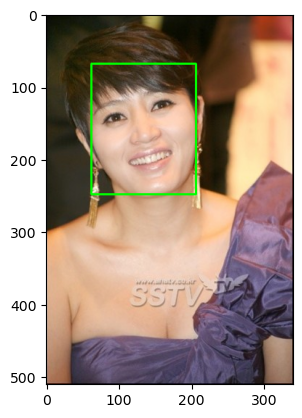

./face\jaesuk.jpg


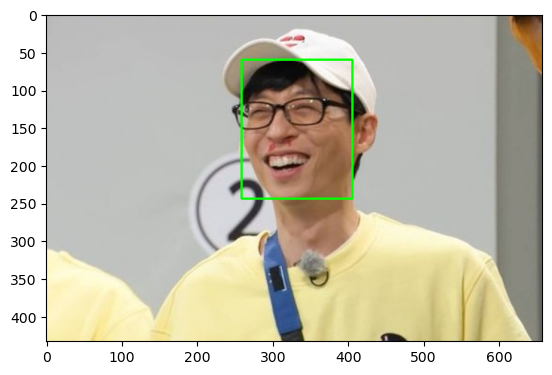

./face\junhee.jpg


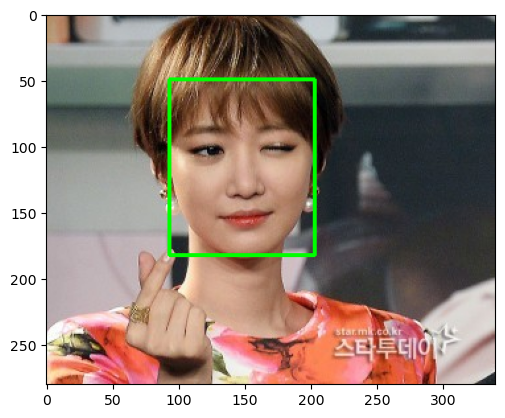

./face\kyungho.jpg


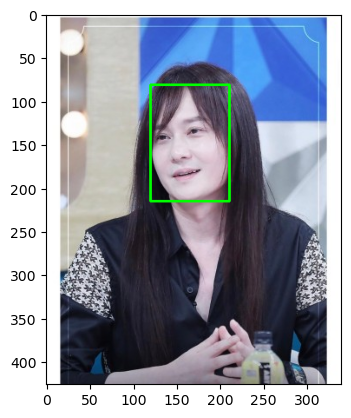

./face\running_man.jpg


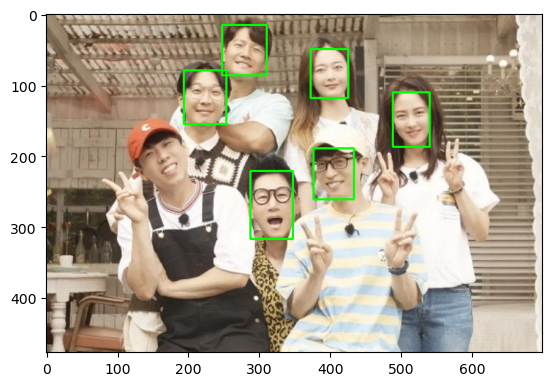

./face\run_back.jpg


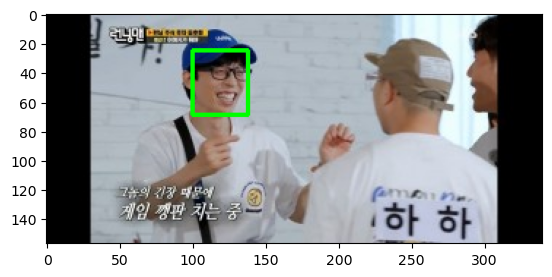

./face\side.jpg


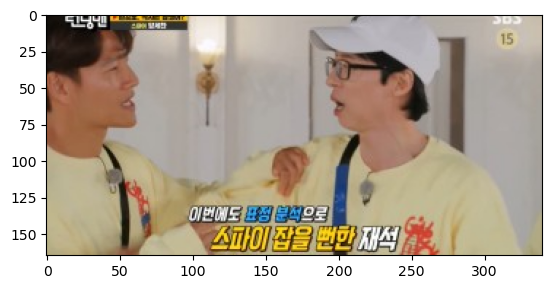

./face\wangu.jpg


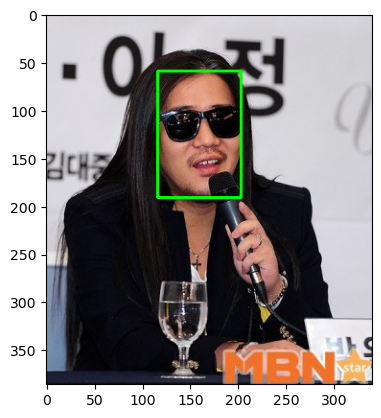

In [13]:
dir_path='./face'

for (root, directories, files) in os.walk(dir_path):        
    for file in files:
        file_path=os.path.join(root, file)
        print(file_path)

        im=cv2.imread(file_path)  # 이미지 읽기
        im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#         plt.imshow(im)
#         plt.show()

        # detect faces (얼굴 검출)
        faces, confidences=cv.detect_face(im)

        # loop through detected faces and add bounding box (검출된 얼굴을 박스로 감싸기)
        for face in faces:
            (startX, startY)=face[0], face[1]
            (endX, endY)=face[2], face[3]

            # draw rectangle over face
            cv2.rectangle(im, (startX, startY), (endX, endY), (0, 255, 0), 2)

        # display output
        plt.imshow(im)
        plt.show()
        #cv2.imwrite('result.jpg', im)

---
### 파이썬 성별 인식

./face\hyesoo.jpg


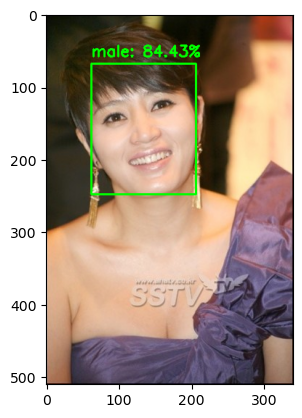

./face\jaesuk.jpg


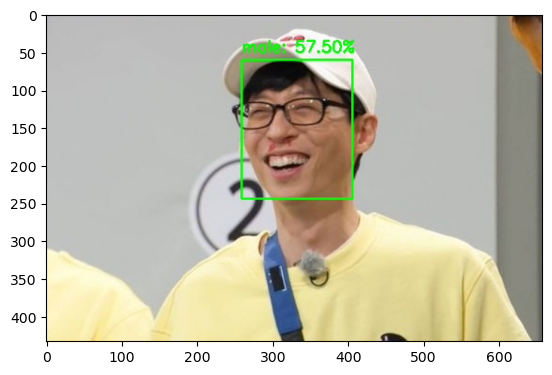

./face\junhee.jpg


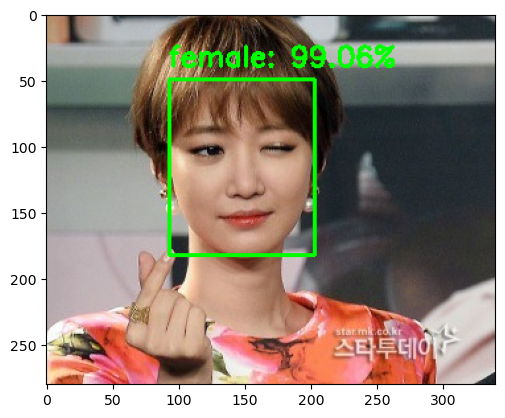

./face\kyungho.jpg


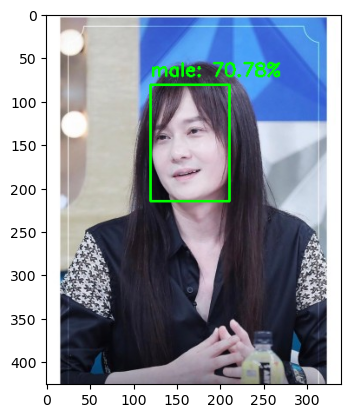

./face\running_man.jpg


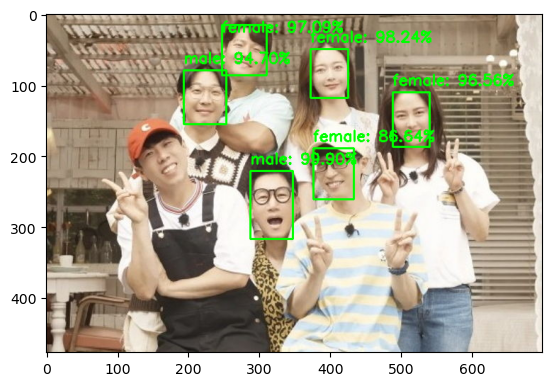

./face\run_back.jpg


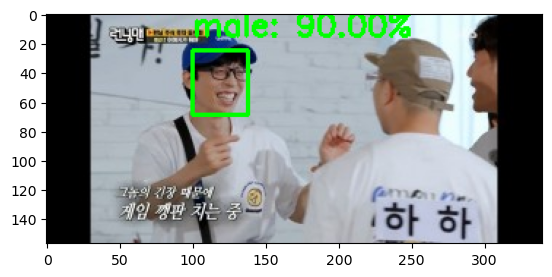

./face\side.jpg


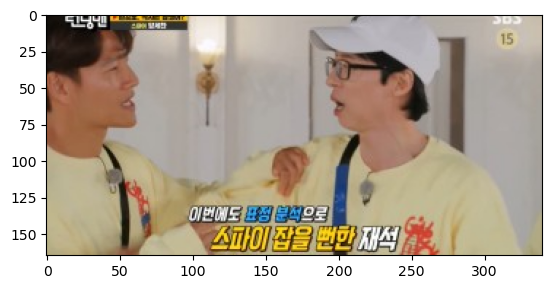

./face\wangu.jpg


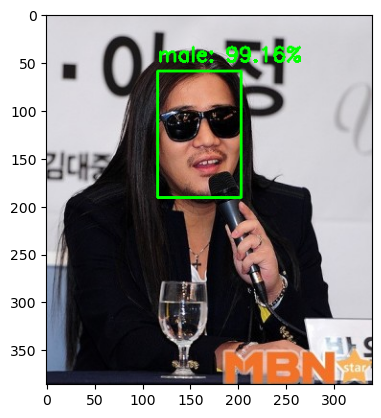

In [14]:
import cv2
import cvlib as cv
import numpy as np
import os
import matplotlib.pyplot as plt

dir_path='./face'

for (root, directories, files) in os.walk(dir_path):        
    for file in files:
        file_path=os.path.join(root, file)
        print('='*100)
        print(file_path)
        
        im=cv2.imread(file_path)  # 이미지 읽기
        im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#         plt.imshow(im)
#         plt.show()
        
        # detect faces (얼굴 검출)
        faces, confidences=cv.detect_face(im)
        
        for face in faces:
            (startX, startY)=face[0], face[1]
            (endX, endY)=face[2], face[3]
            
            # draw rectangle over face
            cv2.rectangle(im, (startX, startY), (endX, endY), (0, 255, 0), 2)
            face_crop=np.copy(im[startY:endY, startX:endX])
            
            # gender detection (성별 검출)
            (label, confidence)=cv.detect_gender(face_crop)
            
            idx=np.argmax(confidence)
            label=label[idx]
            
            label="{}: {:.2f}%".format(label, confidence[idx] * 100)
            
            Y=startY-10 if startY-10 > 10 else startY + 10
            
            # 박스 위에 성별 라벨과 확률 쓰기
            cv2.putText(im, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                       0.7, (0, 255, 0), 2)
            
            
            
        # display output
        plt.imshow(im)
        plt.show()
            
        
        